<a href="https://colab.research.google.com/github/Chirobocea/Artificial-Intelligence/blob/main/Laborator_4_(arbore_cautare%2C_cautare_informata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reprezentare arbori (orientati)

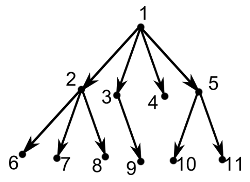

## Liste de parinti, costuri

Arborii sunt formati din noduri cu urmatoarele proprietati: nume/valoare, parinte, fii, cost (optional). In plus, un arbore are o radacina (unica). Aceasta poate fi retinuta explicit, sau poate fi identificata ca fiind singurul nod fara parinti. 
Relatiile intre noduri pot fi reprezentate ori tinand minte intr-o structura parintii fiecarui nod, ori tinand minte fiii fiecarui nod (sau ambele).

Pentru scopul de a retine drumuri prin arborele de cautare, este convenabil sa retinem legaturile catre parinti.
Exista mai multe modalitati posibile. Una dintre ele este folosirea unui dictionar de noduri unde pentru fiecare nod retinem parintele (similar listelor de vecini de la grafuri, doar ca fiecare nod va avea un singur parinte, deci nu mai avem nevoie de liste ca valori in dictionar, ci pot fi scalari).

In [ ]:
arbore_parinti = {
    6: 2,
    7: 2,
    8: 2,
    9: 3,
    10: 5,
    11: 5,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    1: None
}

In exemplul de mai sus, am folosit valoarea speciala din python `None` pentru a indica faptul ca nodul 1 nu are parinte (este radacina).

In [ ]:
type(None)

NoneType

In [ ]:
x = 0
y = None
if x is None:
  print("X este None")

if x is not None:
  print("X nu este None")

if y is None:
  print("Y este None")

if not y:
  print("Y este None (sau 0 sau lista vida...)")

if not x:
  print("X este zero sau None sau lista vida...")

X nu este None
Y este None
Y este None (sau 0 sau lista vida...)
X este zero sau None sau lista vida...


Exercitiu: scrieti reprezentarea arborelui binar din desenul de mai jos, folosind dictionar de parinti.




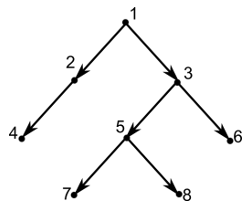

In [ ]:
arbore_parinti = {
    1: None,
    2: 1,
    3: 1,
    4: 2,
    5: 3,
    6: 3,
    7: 5,
    8: 5,
}


Nodurile pot avea asociate costuri (corespunzatoare arcului care ajunge in ele, sau drumului din radacina pana in nod).
Observam ca fiecare nod are asociat un cost unic. In acest caz, putem reprezenta costurile folosind un dictionar separat.




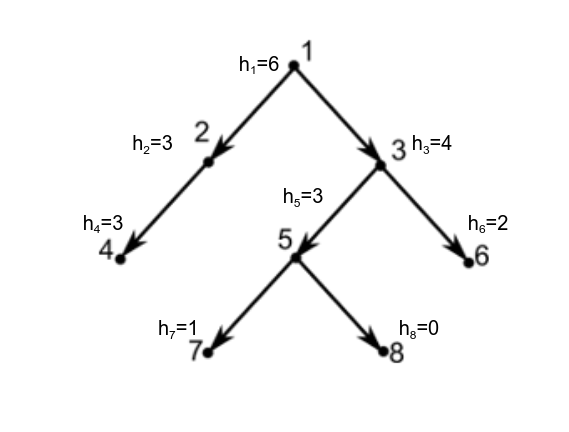

In [ ]:
arbore_costuri = {
    1: 6,
    2: 3,
    3: 4,
    4: 3,
    5: 3,
    6: 2,
    7: 1,
    8: 0
}

Acum putem obtine, pentru un nod dat, si parintele si costul, folosindu-ne de cele doua dictionare.

Exercitiu: obtineti costul asociat nodului parinte al nodului 5:

In [ ]:
n = arbore_parinti[5]
print("Parintele lui 5 este", n)
c = arbore_costuri[n]
print("Costul nodului %d este %d" % (n, c))

Parintele lui 5 este 1
Costul nodului 1 este 6


**Optional**: O alta varianta de reprezentare a arborelui ar fi o lista de noduri, unde nodurile sunt dictionare care contin toate informatiile.
Putem retine fiii in loc de parinti ca legaturi asociate nodurilor (desi pentru problema noastra va fi mai utila reprezentarea unde retinem parintii).


In [ ]:
arbore = [
    {"nod": 1, "fii": [2, 1], "cost": 6},
    {"nod": 2, "fii": [4], "cost": 3},
    {"nod": 3, "fii": [5, 6], "cost": 4},
    {"nod": 4, "fii": [], "cost": 3},
    {"nod": 5, "fii": [7, 8], "cost": 3},
    {"nod": 6, "fii": [], "cost": 2},
    {"nod": 7, "fii": [], "cost": 1},
    {"nod": 8, "fii": [], "cost": 0},
]

Un alt tip de reprezentare comuna foloseste *clase* din Python, insa nu vom discuta aceasta reprezentare.

## Arbore de cautare 

#### Drumul prin graful starilor ca drum in arborele de cautare.

Putem construi drumul prin arborele de cautare treptat, pe masura ce parcurgem graful starilor. Astfel, vom putea reproduce ulterior drumul pe care am ajuns la nodul stare scop de la starea initiala.

### Retinerea drumului prin arborele de cautare.



#### BFS

#### Pasii algoritmului

Initializari. Trebuie sa stabilim un nod de start si unul sau mai multe noduri scop. In plus consideram o lista de noduri (sau drumuri, adica liste de noduri) neexpandate inca, organizata sub forma de coada (o vom nota cu c sau frontiera). Punem nodul de start in coada.

Repetam urmatorii pasi atata timp cat coada nu e vida, sau nu ne-am oprit din cautat drumuri (am calculat deja suficiente drumuri-solutie):
1. Extragem primul nod din coada. **Setam in arborele solutiilor / drumul parcurs parintele radacinei la None.**
2. Verificam daca e nod scop. Daca da, ne oprim. *(in cazul in care ne intereseaza drumul in sine, afisam drumul)*
3. Expandam nodul extras obtinand nodurile lui vecine. **Adaugam in arborele solutiilor / drumul parcurs nodurile vecine si setam parintele lor ca fiind nodul extras.** 
4. Daca nodurile nu au mai fost vizitate, le adaugam in coada c. Pentru a marca nodurile vizitate, verificam pentru fiecare nod (de la radacina pana la nodul tocmai expandat) daca mai apare in nodurile explorate, caz in care nu il adaugam in coada).

**Returnam /afisam arborele solutiilor construit.**


#### DFS

Initializari. Trebuie sa stabilim un nod de start si unul sau mai multe noduri scop. Consideram o stiva S initial vida. Punem nodul de start in stiva S.

Repetam urmatorii pasi atata timp cat stiva nu e vida:

1. Pentru primul nod din stiva verificam daca e nod-scop. Putem continua apoi algoritmul (in cazul in care avem mai multe noduri scop, putem avea un drum care se termina cu un nod-scop dar are si alte cateva astfel de noduri in componenta sa.). **Setam in arborele de solutii / drumul parcurs parintele nodului de start la None**
2. Pentru primul nod din stiva cautam un succesor care nu a mai fost evaluat pana acum din multimea de succesori ai nodului din varful stivei, si care nu se afla in stiva curenta (e nevoie si de a doua precizare fiindca nodul succesor daca se afla in stiva curenta, a fost evaluat anterior, dar cu alt parinte). Il punem in stiva, succesorul devenind astfel noul varf. **Adaugam in arborele de solutii / drumul parcurs nodul succesor ales, si cu parintele sau nodul din varful stivei**

3. Daca nu avem succesori pentru primul nod din stiva, il stergem din stiva (spunem ca se realizeaza o intoarcere).

**Returnam / afisam arborele de solutii / drumul construit.**

## Coada de prioritati

Intr-o coada de prioritati, elementele se adauga si se elimina conform unui cost.

In [ ]:
def extrage_min(l):
  if len(l)==0:
    return None
  # l[0] = (2, 3)   (nodul 2 cu costul 3)
  m = l[0][1]
  im = 0
  for i in range(len(l)):
    if l[i][1] < m:
      m = l[i][1]
      im = i
  l.pop(im)
  return m


In [ ]:
lista_noduri_costuri = [(1,2), (2,7), (3,0), (4,9), (5,-3), (6,2), (7,3)]
print("Minimul este", extrage_min(lista_noduri_costuri))
print("Lista este acum:", lista_noduri_costuri)

Minimul este -3
Lista este acum: [(1, 2), (2, 7), (3, 0), (4, 9), (6, 2), (7, 3)]


In [ ]:
print(sorted([4, 5, 6, 2]))

[2, 4, 5, 6]


In [ ]:
# sorteaza lista_noduri_costuri dupa x[1], daca x e un element oarecare al listei
print(sorted(lista_noduri_costuri, key=lambda x: x[1])) 

[(3, 0), (1, 2), (6, 2), (7, 3), (2, 7), (4, 9)]


In [ ]:
def f(x):
  return x[0]

# sorteaza lista_noduri_costuri dupa o functie f
print(sorted(lista_noduri_costuri, key=lambda x: f(x))) 

[(1, 2), (2, 7), (3, 0), (4, 9), (6, 2), (7, 3)]


Putem retine coada de prioritati unde stocam frontiera ca o lista sortata. La fiecare inserare a unui element nou, il inseram la locul corect, astfel incat lista sa ramana sortata.

In [ ]:
l = [1, 2, 4, 6, 7]
l.insert(3, 5) # insereaza la pozitia 3 elementul 5
print(l)

[1, 2, 4, 5, 6, 7]


In [ ]:
def inserare_element_prioritati(element, coada_prioritati):
  if len(coada_prioritati) == 0:
    coada_prioritati.append(element)
  else:
    el_curent = coada_prioritati[0]
    i = 0
    while(el_curent[1] < element[1]):
      i += 1
      if i >= len(coada_prioritati):
        break
      el_curent = coada_prioritati[i]
    # Am ajuns la locul potrivit elementului
    coada_prioritati.insert(i, element)

In [ ]:
lista = []
inserare_element_prioritati((3,0), lista)
inserare_element_prioritati((1,2), lista)
inserare_element_prioritati((7,3), lista)
inserare_element_prioritati((6,2), lista)
inserare_element_prioritati((3,0), lista)
print(lista)

[(3, 0), (3, 0), (6, 2), (1, 2), (7, 3)]


Pentru scoaterea elementului de cost minim, e suficient sa scoatem primul element.

In [ ]:
lista.pop(0)

(3, 0)



### Algoritmul Greedy de cautare

#### Pasii algoritmului



Se considera doua liste: OPEN / frontiera (cu nodurile descoperite care inca nu au fost expandate) si CLOSED / explorate (cu nodurile descoperite si expandate).

1. In lista open se pune la inceput doar nodul de pornire.

2. Initial lista closed e vida.

3. cat timp lista open nu e vida se executa repetitiv pasii urmatori:
 
  a. se extrage primul nod, n, din lista open si se pune in closed
 
  b. daca nodul n este nodul scop, oprim cautarea si afisam drumul de la nodul-start pana la n
 
  c. extindem nodul n, obtinand succesorii lui in graf. Nu se vor lua in considerare succesorii care se afla in nodurile explorate. Toti succesorii il au ca parinte pe n, pe care il trec in arborele solutiei. Toti succesorii care nu se afla deja in open sau closed sunt inserati in lista open astfel incat fie in continuare ordonata dupa g.


### Algoritmul A* 



Se considera doua liste: OPEN / frontiera (cu nodurile descoperite care inca nu au fost expandate) si CLOSED / explorate (cu nodurile descoperite si expandate).

1. In lista open se pune la inceput doar nodul de pornire.

2. Initial lista closed e vida.

3. cat timp lista open nu e vida se executa repetitiv pasii urmatori:
 
  a. se extrage primul nod, n, din lista open si se pune in closed
 
  b. daca nodul n este nodul scop, oprim cautarea si afisam drumul de la nodul-start pana la n
 
  c. extindem nodul n, obtinand succesorii lui in graf. Nu se vor lua in considerare succesorii care se afla in nodurile explorate. Toti succesorii il au ca parinte pe n, pe care il trec in arborele solutiei. Toti succesorii care nu se afla deja in open sau closed sunt inserati in lista open astfel incat fie in continuare ordonata dupa f. Daca sunt doua noduri cu acelasi f, se aseaza inainte nodul cu g-ul mai mare.
 
  d. Pentru succesorii care sunt deja in open sau closed, in cazul in care pentru drumul care trece prin n, s-a obtinut un f mai mic, li se schimba parintele la n, si li se actualizeaza f-ul, iar nodurile din open sunt repozitionate in lista astfel incat sa ramana ordonata crescator dupa f.
 
  e. Pentru nodurile din closed (care au fost deja expandate) ar trebui refacut calculul pentru nodurile succesoare lor, prin urmare, cel mai simplu este sa le readaugam in open).

# Exercitii

### Tema 1p

1. Scrieti o functie care afiseaza drumul de la un nod frunza n pana la radacina arborelui.

Exemplu pentru arborele binar de mai sus:



```
afis_drum(arbore_parinti, 7)

7 5 3 1
```




In [ ]:
arbore_parinti = {
    1: None,
    2: 1,
    3: 1,
    4: 2,
    5: 3,
    6: 3,
    7: 5,
    8: 5,
}

In [ ]:
def afis_drum(arbore_parinti, frunza):
  k=frunza
  while k is not None:
    print(k)
    k=arbore_parinti[k]

In [ ]:
afis_drum(arbore_parinti, 7)

7
5
3
1


2. Modificati functia de mai sus astfel incat sa afiseze drumul incepand de la radacina.

Hint: varianta folosind stiva


```
afis_drum(arbore_parinti, 7)

1 3 5 7
```

In [ ]:
arbore_parinti = {
    1: None,
    2: 1,
    3: 1,
    4: 2,
    5: 3,
    6: 3,
    7: 5,
    8: 5,
}

In [ ]:
def afis_drum_invers(arbore_parinti, frunza):
  k=frunza
  lista = []
  while k is not None:
    lista.append(k)
    k=arbore_parinti[k]
  while len(lista):
    print(lista[len(lista)-1])
    lista.pop()

In [ ]:
afis_drum_invers(arbore_parinti, 7)

1
3
5
7


3. Calculati adancimea maxima a unui arbore dat.

Hint: puteti compara toate drumurile din orice nod catre radacina.

Pentru a obtine toate cheile unui dictionar `arbore` **putem** folosi `arbore.keys()`

In [ ]:
arbore_parinti.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
for n in arbore_parinti.keys():
  print(n)

1
2
3
4
5
6
7
8


In [ ]:
print(list(arbore_parinti.keys()))

[1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
def adancime_maxima(arbore_parinti):
  max=0
  k=0
  for i in arbore_parinti.keys():
    while i is not None:
      i=arbore_parinti[i]
      k=k+1
    if k>max:
      max=k
    k=0
  return max

In [ ]:
print(adancime_maxima(arbore_parinti))

4


4. Calculati suma costurilor de la o frunza data la radacina (insumand costurile fiecarui nod de pe drum). Testati functia pe arborele de costuri definit mai devreme.

In [ ]:
arbore_parinti = {
    1: None,
    2: 1,
    3: 1,
    4: 2,
    5: 3,
    6: 3,
    7: 5,
    8: 5,
}
arbore_costuri = {
    1: 6,
    2: 3,
    3: 4,
    4: 3,
    5: 3,
    6: 2,
    7: 1,
    8: 0
}

In [ ]:
def suma_cost_drum(arbore_parinti, arbore_costuri, frunza):
  cost=0
  while frunza is not None:
    cost=cost+arbore_costuri[frunza]
    frunza=arbore_parinti[frunza]
  return cost

In [ ]:
suma_cost_drum(arbore_parinti, arbore_costuri, 5)

13

Se da problema de mai jos cu graful orientat corespunzator problemei, cu costurile asociate fiecarui arc (pe arc), si in plus cu valorile unei euristici asociate fiecarui nod (in chenare). Implementati solutii de cautare informata pe baza unui graf reprezentat printr-o matrice de adiacenta/costuri si un dictionar de valori ale functiei euristice, si testati-o pe graful de mai jos.

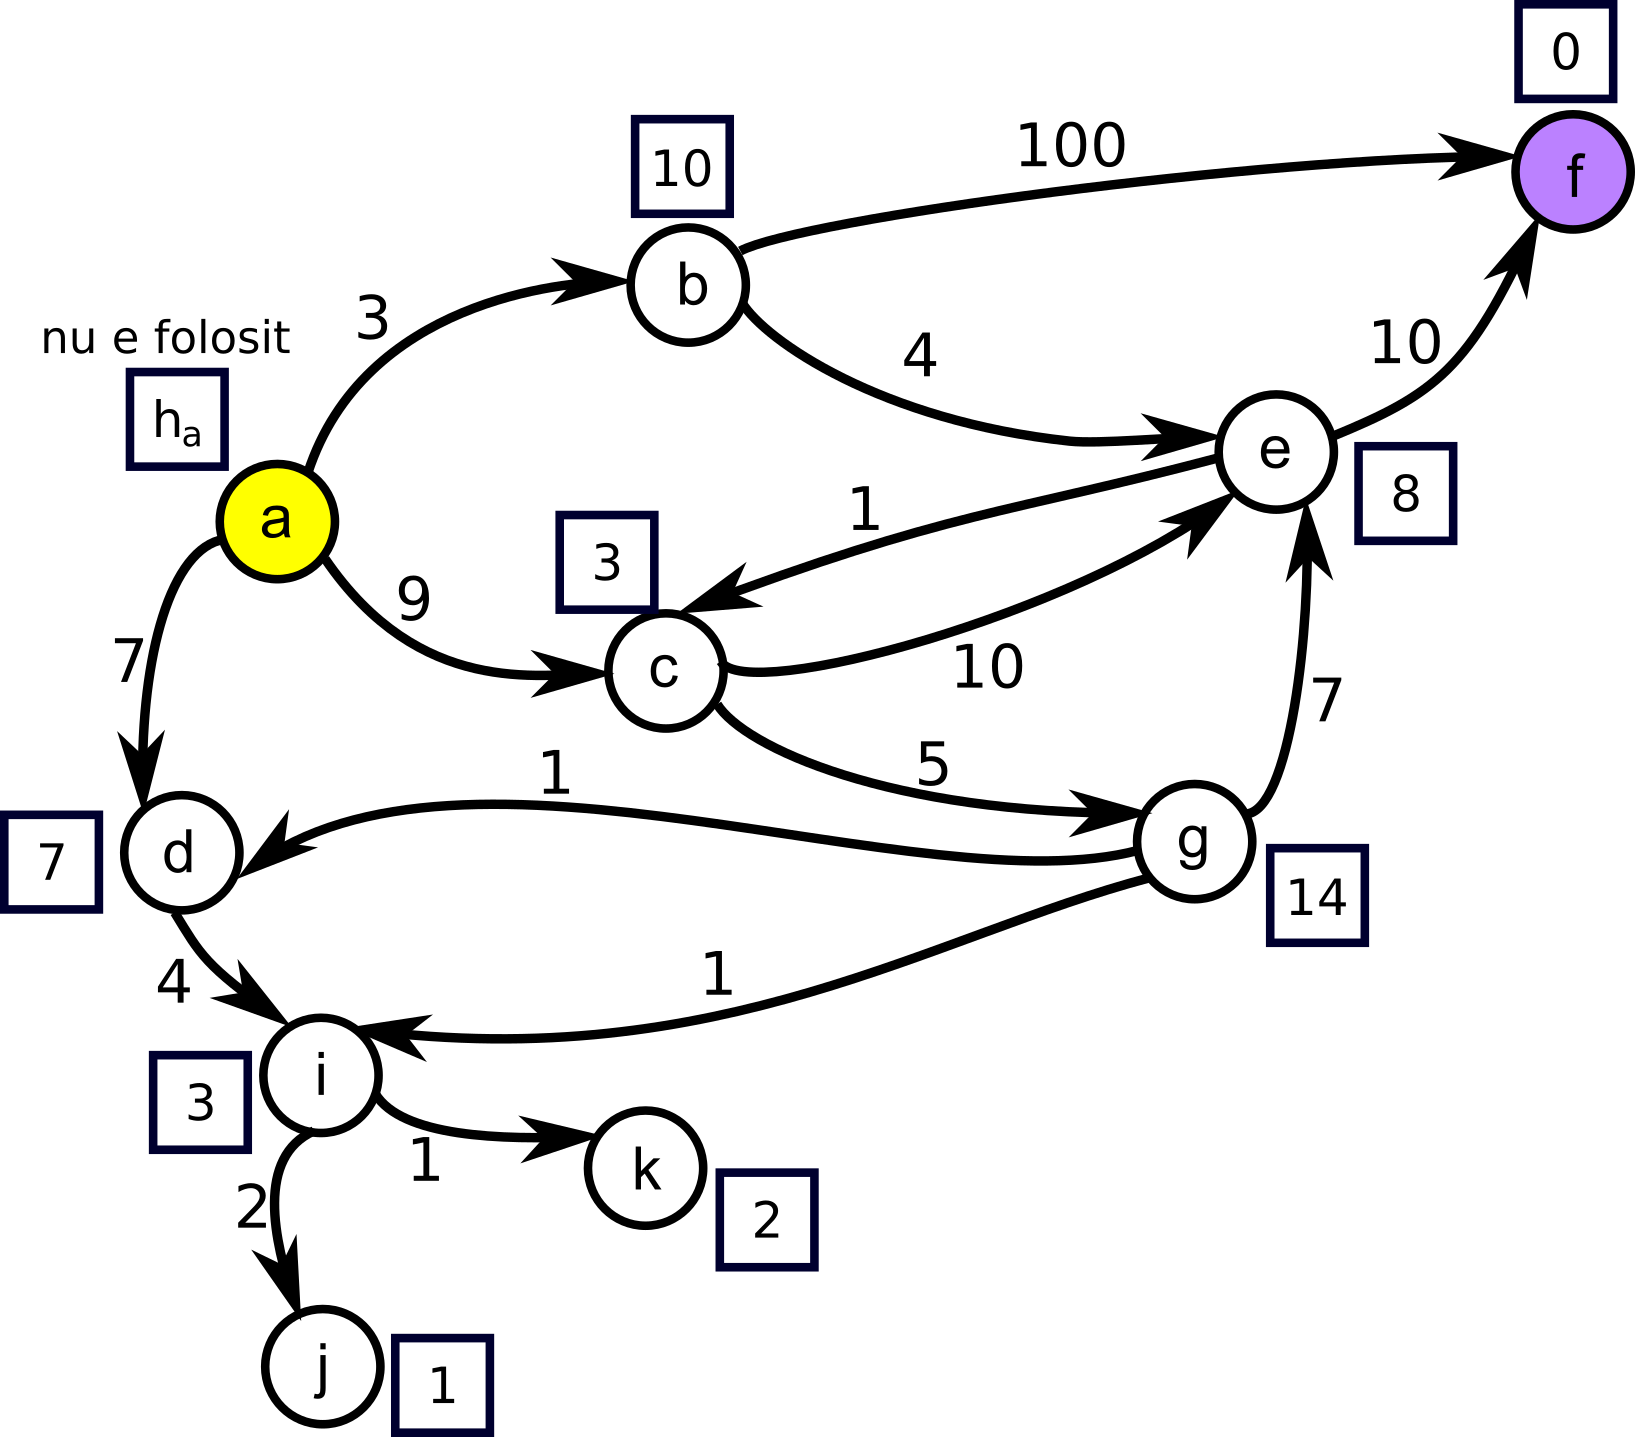

In [ ]:
mo = [
  [0, 3, 9, 7, 0, 0, 0, 0, 0, 0],   
  [0, 0, 0, 0, 4, 100, 0, 0, 0, 0],
  [0, 0, 0, 0, 10, 0, 5, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 4, 0 ,0],
  [0, 0, 0, 0, 0, 10, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 7, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 2, 1],
  [0, 0, 0, 0, 0, 0, 0, 4, 0 ,0],
  [0, 0, 0, 0, 0, 0, 0, 4, 0 ,0],
]
noduri = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'i', 'j', 'k']

In [ ]:
val_euristici = {
    'a': None,
    'b': 10,
    'c': 3,
    'd': 7,
    'e': 8,
    'f': 0,
    'g': 14,
    'i': 3,
    'j': 1,
    'k': 2
}

5. Implementati cautarea greedy pentru graful de mai sus definit printr-o matrice de adiacenta si un dictionar de costuri euristice pentru fiecare nod.

In [ ]:
def inserare_element_prioritati(element, coada_prioritati):
  if len(coada_prioritati) == 0:
    coada_prioritati.append(element)
  else:
    el_curent = coada_prioritati[0]
    i = 0
    while(el_curent[1] < element[1]):
      i += 1
      if i >= len(coada_prioritati):
        break
      el_curent = coada_prioritati[i]
    # Am ajuns la locul potrivit elementului
    coada_prioritati.insert(i, element)

def check_frontiera(n, frontiera):
    for i in frontiera:
        if i[0]==n:
            return False
    return True

def greedy(g, nod_start, nod_scop):
    frontiera = [(nod_start, g.val_euristici[nod_start])]
    parcurse = set()
    solutii = 0  # retinem cate solutii am gasit
    nr_sol = len(nod_scop)  # retinem cate solutii trebuie sa gasim
    print("Frontiera: ", frontiera)
    print("Parcurse: ", parcurse)
    while len(frontiera):
        n = frontiera.pop(0)  # eliminam nodul curent din frontiera - coada
        n_index = g.noduri.index(n[0])
        parcurse.add(n[0])
        print("Nod: ", n[0])
        if n[0] in nod_scop:
            solutii = solutii + 1
            if solutii == nr_sol:
                break  # daca am gasit numarul necesar de solutii, oprim ciclarea

        for i in range(len(g.m)):
            # verificam daca exista arc si daca nodul nu a mai fost parcurs
            if g.m[n_index][i] != 0 and g.noduri[i] not in parcurse and check_frontiera(g.noduri[i], frontiera):
                inserare_element_prioritati((g.noduri[i], g.val_euristici[g.noduri[i]]), frontiera)
        print("Frontiera: ", frontiera)
        print("Parcurse: ", parcurse)


# Date de test
class Graf:
    m = [
        [0, 3, 9, 7, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 4, 100, 0, 0, 0, 0],
        [0, 0, 0, 0, 10, 0, 5, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
        [0, 0, 0, 0, 0, 10, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 7, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2, 1],
        [0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
    ]
    noduri = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'i', 'j', 'k']
    val_euristici = {
        'a': None,
        'b': 10,
        'c': 3,
        'd': 7,
        'e': 8,
        'f': 0,
        'g': 14,
        'i': 3,
        'j': 1,
        'k': 2
    }


g = Graf()
nod_start = 'a'
nod_scop = ['f']

# Apel
greedy(g, nod_start, nod_scop)

Frontiera:  [('a', None)]
Parcurse:  set()
Nod:  a
Frontiera:  [('c', 3), ('d', 7), ('b', 10)]
Parcurse:  {'a'}
Nod:  c
Frontiera:  [('d', 7), ('e', 8), ('b', 10), ('g', 14)]
Parcurse:  {'c', 'a'}
Nod:  d
Frontiera:  [('i', 3), ('e', 8), ('b', 10), ('g', 14)]
Parcurse:  {'c', 'a', 'd'}
Nod:  i
Frontiera:  [('j', 1), ('k', 2), ('e', 8), ('b', 10), ('g', 14)]
Parcurse:  {'c', 'a', 'i', 'd'}
Nod:  j
Frontiera:  [('k', 2), ('e', 8), ('b', 10), ('g', 14)]
Parcurse:  {'c', 'a', 'i', 'j', 'd'}
Nod:  k
Frontiera:  [('e', 8), ('b', 10), ('g', 14)]
Parcurse:  {'c', 'a', 'i', 'j', 'd', 'k'}
Nod:  e
Frontiera:  [('f', 0), ('b', 10), ('g', 14)]
Parcurse:  {'c', 'a', 'i', 'j', 'd', 'e', 'k'}
Nod:  f


6. Implementati cautarea A* pentru graful de mai sus definit printr-o matrice de adiacenta si un dictionar de costuri euristice pentru fiecare nod.

In [ ]:
def inserare_element_prioritati(element, coada_prioritati):
    if len(coada_prioritati) == 0:
        coada_prioritati.append(element)
    else:
        el_curent = coada_prioritati[0]
        i = 0
        while el_curent[1] < element[1]:
            i += 1
            if i >= len(coada_prioritati):
                break
            el_curent = coada_prioritati[i]
        # Am ajuns la locul potrivit elementului
        coada_prioritati.insert(i, element)

def suma_cost_drum(start, end, arbore, m, noduri):
    s = noduri.index(start)
    e = noduri.index(end)
    cost = m[s][e]
    if arbore[start][1] != 0:
        cost = cost + arbore[start][1]
    return cost

def check_frontiera(n, frontiera):
    for i in frontiera:
        if i[0]==n:
            return False
    return True

def astar(g, nod_start, nod_scop):
    frontiera = [(nod_start, g.val_euristici[nod_start])]
    g.arbore[nod_start] = [None, 0]
    parcurse = set()
    solutii = 0  # retinem cate solutii am gasit
    nr_sol = len(nod_scop)  # retinem cate solutii trebuie sa gasim
    print("Frontiera: ", frontiera)
    print("Parcurse: ", parcurse)
    print()
    while len(frontiera):
        n = frontiera.pop(0)  # eliminam nodul curent din frontiera - coada
        n_index = g.noduri.index(n[0])
        parcurse.add(n[0])
        print("Nod curent: ", n[0])
        if n[0] in nod_scop:
            solutii = solutii + 1
            if solutii == nr_sol:
                break  # daca am gasit numarul necesar de solutii, oprim ciclarea

        for i in range(len(g.m)):
            # verificam daca exista arc si daca nodul nu a mai fost parcurs
            if g.m[n_index][i] != 0 and g.noduri[i] not in parcurse and check_frontiera(g.noduri[i], frontiera):
                g.arbore[g.noduri[i]] = [n[0], 0]
                g.arbore[g.noduri[i]][1] = suma_cost_drum(n[0], g.noduri[i], g.arbore, g.m, g.noduri)
                inserare_element_prioritati((g.noduri[i], g.val_euristici[g.noduri[i]] + g.arbore[g.noduri[i]][1]),
                                            frontiera)
        print("Arbore generat: ", g.arbore)
        print("Frontiera: ", frontiera)
        print("Parcurse: ", parcurse)
        print()


# Date de test
class Graf:
    m = [
        [0, 3, 9, 7, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 4, 100, 0, 0, 0, 0],
        [0, 0, 0, 0, 10, 0, 5, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
        [0, 0, 0, 0, 0, 10, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 7, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2, 1],
        [0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
    ]
    noduri = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'i', 'j', 'k']
    val_euristici = {
        'a': None,
        'b': 10,
        'c': 3,
        'd': 7,
        'e': 8,
        'f': 0,
        'g': 14,
        'i': 3,
        'j': 1,
        'k': 2
    }
    arbore = {}


g = Graf()
nod_start = 'a'
nod_scop = ['f']

# Apel
astar(g, nod_start, nod_scop)


Frontiera:  [('a', None)]
Parcurse:  set()

Nod curent:  a
Arbore generat:  {'a': [None, 0], 'b': ['a', 3], 'c': ['a', 9], 'd': ['a', 7]}
Frontiera:  [('c', 12), ('b', 13), ('d', 14)]
Parcurse:  {'a'}

Nod curent:  c
Arbore generat:  {'a': [None, 0], 'b': ['a', 3], 'c': ['a', 9], 'd': ['a', 7], 'e': ['c', 19], 'g': ['c', 14]}
Frontiera:  [('b', 13), ('d', 14), ('e', 27), ('g', 28)]
Parcurse:  {'c', 'a'}

Nod curent:  b
Arbore generat:  {'a': [None, 0], 'b': ['a', 3], 'c': ['a', 9], 'd': ['a', 7], 'e': ['c', 19], 'g': ['c', 14], 'f': ['b', 103]}
Frontiera:  [('d', 14), ('e', 27), ('g', 28), ('f', 103)]
Parcurse:  {'b', 'c', 'a'}

Nod curent:  d
Arbore generat:  {'a': [None, 0], 'b': ['a', 3], 'c': ['a', 9], 'd': ['a', 7], 'e': ['c', 19], 'g': ['c', 14], 'f': ['b', 103], 'i': ['d', 11]}
Frontiera:  [('i', 14), ('e', 27), ('g', 28), ('f', 103)]
Parcurse:  {'b', 'c', 'a', 'd'}

Nod curent:  i
Arbore generat:  {'a': [None, 0], 'b': ['a', 3], 'c': ['a', 9], 'd': ['a', 7], 'e': ['c', 19], 'g'

# Tema-proiect (3p) (deadline 3 sapt)

Rezolvati una dintre urmatoarele probleme folosind un algoritm de cautare neinformata si un algoritm de cautare informata (la alegere):

- Problema 8-puzzle
- Problema canibalilor si misionarilor
- Problema depasarii Arad-Bucuresti


Pasi rezolvare:


1.   Definiti graful de stari.
  
  a. Ce informatii trebuie retinute in fiecare nod?
  
  b. Cum se definesc arcele intre noduri / tranzitiile? Care sunt actiunile posibile?
  
  c. Care este starea initiala si care este starea finala?
  
  d. Exista costuri asociate arcelor? (altfel, costul fiecarui arc va fi 1)


...mai multe detalii in documentul PDF.




In [ ]:
import numpy as np

# this function makes a  priority_queue sorted by the second number from element
# element is composed by (node_name, heuristic, cost)
# value(node) = cost(node) + heuristic(node)
def insert_into_priority_queue(element, priority_queue):
    if len(priority_queue) == 0:
        priority_queue.append(element)
    else:
        current_element = priority_queue[0]
        i = 0
        while current_element[1]+current_element[2] <= element[1]+element[2]:
            if current_element[1]+current_element[2] == element[1]+element[2] and element[2] > current_element[2]:
                break
            i = i + 1
            if i >= len(priority_queue):
                break
            current_element = priority_queue[i]
        priority_queue.insert(i, element)

# this function verify if node is in open
# node is composed by (node_name, value)
def is_in_open(node, open):
    for i in open:
        if i[0] == node:
            return True
    return False

# this function shows the road from the root of the three to the node
def show_road(tree, node):
    print("     The road is: ")
    list = []
    k = node
    # we ar using a tree of parents where the value is the parent of the key
    # eg. tree[k][0] is the parent of k
    while k is not None:
        list.append(k)
        k = tree[k]
    no = 0
    while len(list):
        no += 1
        print(no, ". ", list[len(list) - 1])
        list.pop()

class Graph:

    def __init__(self, arches, heuristics, matrix_size):
        self.nodes = []
        for i in heuristics.keys():
            self.nodes.append(i)
        self.arches = arches
        self.heuristics = heuristics
        self.matrix = np.zeros((matrix_size, matrix_size), dtype=int)
        self.convert_matrix()

    # this function convert the list of archees to an adjacency matrix
    def convert_matrix(self):
        for n in self.arches:
            i = self.nodes.index(n[0])
            j = self.nodes.index(n[1])
            self.matrix[i][j] = n[2]

    # this function returns the cost of the road from the root of the tree to the node
    def road_cost(self, node, tree):
        cost = 0
        last_node = node
        current_node = tree[last_node]
        while current_node is not None:
            cost = cost + self.matrix[self.nodes.index(current_node)][self.nodes.index(last_node)]
            last_node = current_node
            current_node = tree[last_node]
        return cost

    def ucs(self, start_node, target_nodes):
        no_steps=0
        print("--- Uniform Cost Search algorthm --- uninformed search")
        tree = {}   # represents the generated tree of the graph of states
        open = [(start_node, 0)]    # represents the expanded nodes of the tree
        # open is a list of tuples like (node_name, cost)
        tree[start_node] = None    # initializing tree with the root
        close = set()   # represents visited nodes
        solutions = 0   # represents no of solutions found
        no_sol = len(target_nodes)  # represents no of solutions needed
        """
        # we can print open and close at each step to see how the program works
        print("Open: ", open)
        print("Close: ", close)
        print()
        """
        while len(open):
            no_steps+=1
            current_node = open.pop(0)  # eliminate the current node from open
            node_index = self.nodes.index(current_node[0])  # the index of the current node
            close.add(current_node[0])  # adding the current node to close
            #print("Current node: ", current_node[0])
            # we can print current node at each step to see better how the program works
            if current_node[0] in target_nodes: # we found a solution
                solutions = solutions + 1
                show_road(tree, current_node[0])    # show the rood to the solution
                print("Cost of the road: ", current_node[2])    # show the cost of the solution
                if solutions == no_sol:
                    break  # if we found all the solution, we stop

            for i in range(len(self.matrix)):
                # verifying if from the current node to the new one (i) is an archer
                if self.matrix[node_index][i] != 0:
                    # verify if the node is in open or close
                    if self.nodes[i] in close or is_in_open(self.nodes[i], open):
                        # retain the cost, and the father of node i before any change
                        prev_cost = self.road_cost(self.nodes[i], tree)
                        prev_father = tree[self.nodes[i]]
                        # change the nod i how was already visited
                        tree[self.nodes[i]] = current_node[0]
                        # if the change is good (the road is cheaper), we keep it
                        if self.road_cost(self.nodes[i], tree) < prev_cost:
                            insert_into_priority_queue(
                                (self.nodes[i], 0, self.road_cost(self.nodes[i], tree)),
                                open)
                            # we put back the visited neighbours of this node in open
                            for j in range(len(self.matrix)):
                                if self.matrix[i][j] != 0 and self.nodes[j] in close:
                                    close.remove(self.nodes[j])
                                    insert_into_priority_queue(
                                        (self.nodes[j], 0,
                                         self.road_cost(self.nodes[j], tree)),
                                        open)
                        # if the change is not good, we take back to the last version
                        else:
                            tree[self.nodes[i]]=prev_father
                    # if the node is not in open or close, we simply add it to tree and open
                    else:
                        tree[self.nodes[i]] = current_node[0]
                        insert_into_priority_queue((self.nodes[i], 0, self.road_cost(self.nodes[i], tree)), open)
            """
            # we can print open and close at each step to see how the program works
            print("Tree: ", tree)
            print("Open: ", open)
            print("Close: ", close)
            print()
            """
        print("No steps made by program: ", no_steps)
        print()

    def astar(self, start_node, target_nodes):
        no_steps=0
        print("--- A* algorithm --- informed search")
        tree = {}   # represents the generated tree of the graph of states
        open = [(start_node, self.heuristics[start_node], 0)]  # represents the expanded nodes of the tree
        # open is a list of tuples like (node_name, heuristic_value, cost)
        tree[start_node] = None  # initializing tree with the root
        close = set()   # represents visited nodes
        solutions = 0   # represents no of solutions found
        no_sol = len(target_nodes)  # represents no of solutions needed
        """
        # we can print open and close at each step to see how the program works
        print("Open: ", open)
        print("Close: ", close)
        print()
        """
        while len(open):
            no_steps+=1
            current_node = open.pop(0)  # eliminate the current node from open
            node_index = self.nodes.index(current_node[0])  # the index of the current node
            close.add(current_node[0])  # adding the current node to close

            # tree has a node as a key, and a list of his parent name and his cost from the root
            #print("Current node: ", current_node[0])
            # we can print current node at each step to see better how the program works
            if current_node[0] in target_nodes: # we found a solution
                solutions = solutions + 1
                show_road(tree, current_node[0])    # show the rood to the solution
                print("Cost of the road: ", current_node[2])    # show the cost of the solution
                if solutions == no_sol:
                    break  # if we found all the solution, we stop

            for i in range(len(self.matrix)):
                # verifying if from the current node to the new one (i) is an archer
                if self.matrix[node_index][i] != 0:
                    # verify if the node is in open or close
                    if self.nodes[i] in close or is_in_open(self.nodes[i], open):
                        # retain the cost, and the father of node i before any change
                        prev_cost = self.road_cost(self.nodes[i], tree)
                        prev_father = tree[self.nodes[i]]
                        # change the nod i how was already visited
                        tree[self.nodes[i]] = current_node[0]
                        # if the change is good (the road is cheaper), we keep it
                        if self.road_cost(self.nodes[i], tree) < prev_cost:
                            insert_into_priority_queue(
                                (self.nodes[i], self.heuristics[self.nodes[i]], self.road_cost(self.nodes[i], tree)),
                                open)
                            # we put back the visited neighbours of this node in open
                            for j in range(len(self.matrix)):
                                if self.matrix[i][j] != 0 and self.nodes[j] in close:
                                    close.remove(self.nodes[j])
                                    insert_into_priority_queue(
                                        (self.nodes[j], self.heuristics[self.nodes[j]],
                                         self.road_cost(self.nodes[j], tree)),
                                        open)
                        # if the change is not good, we take back to the last version
                        else:
                            tree[self.nodes[i]]=prev_father
                    # if the node is not in open or close, we simply add it to tree and open
                    else:
                        tree[self.nodes[i]] = current_node[0]
                        insert_into_priority_queue((self.nodes[i], self.heuristics[self.nodes[i]], self.road_cost(self.nodes[i], tree)),
                                                   open)

            # we can print open and close at each step to see how the program works
            print("Tree: ", tree)
            print("Open: ", open)
            print("Close: ", close)
            print()

        print("No steps made by program: ", no_steps)
        print()


# Dates

# This is the list of arches in our graph, the third value represents the cost
arches = [('Arad', 'Zerind', 75), ('Arad', 'Sibiu', 140), ('Arad', 'Timisoara', 118),
          ('Zerind', 'Oradea', 71),
          ('Sibiu', 'Fagaras', 99), ('Sibiu', 'Ramnicu Valcea', 80),
          ('Timisoara', 'Lugoj', 111),
          ('Fagaras', 'Bucharest', 211),
          ('Ramnicu Valcea', 'Pitesti', 97), ('Ramnicu Valcea', 'Craiova', 146),
          ('Lugoj', 'Mehadia', 70),
          ('Mehadia', 'Drobeta', 75),
          ('Drobeta', 'Craiova', 120),
          ('Craiova', 'Pitesti', 138),
          ('Pitesti', 'Bucharest', 101),
          ('Bucharest', 'Giurgiu', 90),
          ('Bucharest', 'Urziceni', 85),
          ('Urziceni', 'Vaslui', 142), ('Urziceni', 'Hirsova', 98),
          ('Hirsova', 'Eforie', 86),
          ('Vaslui', 'Iasi', 92),
          ('Iasi', 'Neamt', 87)]

# The heuristics for each node represents the straight distance from target_node to them
heuristics = {
    'Arad': 336,
    'Bucharest': 0,
    'Craiova': 160,
    'Drobeta': 242,
    'Eforie': 161,
    'Fagaras': 178,
    'Giurgiu': 77,
    'Hirsova': 151,
    'Iasi': 226,
    'Lugoj': 244,
    'Mehadia': 241,
    'Neamt': 234,
    'Oradea': 380,
    'Pitesti': 98,
    'Ramnicu Valcea': 193,
    'Sibiu': 253,
    'Timisoara': 329,
    'Urziceni': 80,
    'Vaslui': 199,
    'Zerind': 374
}

# Matrix_size represents the length of the adjacency matrix
matrix_size = len(heuristics.keys())

# Creating the graph object
graph = Graph(arches, heuristics, matrix_size)
stat_node = 'Arad'
target_nodes = ['Bucharest']

# Call the algorithms
graph.ucs(stat_node, target_nodes)
graph.astar(stat_node, target_nodes)

--- Uniform Cost Search algorthm --- uninformed search
     The road is: 
1 .  Arad
2 .  Sibiu
3 .  Ramnicu Valcea
4 .  Pitesti
5 .  Bucharest
Cost of the road:  418
No steps made by program:  13

--- A* algorithm --- informed search
Tree:  {'Arad': None, 'Sibiu': 'Arad', 'Timisoara': 'Arad', 'Zerind': 'Arad'}
Open:  [('Sibiu', 253, 140), ('Timisoara', 329, 118), ('Zerind', 374, 75)]
Close:  {'Arad'}

Tree:  {'Arad': None, 'Sibiu': 'Arad', 'Timisoara': 'Arad', 'Zerind': 'Arad', 'Fagaras': 'Sibiu', 'Ramnicu Valcea': 'Sibiu'}
Open:  [('Ramnicu Valcea', 193, 220), ('Fagaras', 178, 239), ('Timisoara', 329, 118), ('Zerind', 374, 75)]
Close:  {'Sibiu', 'Arad'}

Tree:  {'Arad': None, 'Sibiu': 'Arad', 'Timisoara': 'Arad', 'Zerind': 'Arad', 'Fagaras': 'Sibiu', 'Ramnicu Valcea': 'Sibiu', 'Craiova': 'Ramnicu Valcea', 'Pitesti': 'Ramnicu Valcea'}
Open:  [('Pitesti', 98, 317), ('Fagaras', 178, 239), ('Timisoara', 329, 118), ('Zerind', 374, 75), ('Craiova', 160, 366)]
Close:  {'Ramnicu Valcea', 'Sib